In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [18]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/andrew_furey.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416076894227910659,1416076894227910656,2021-07-16 22:16:55 India Standard Time,2021-07-16,22:16:55,530,444915052,fureyandrew,Andrew Furey,,...,,,,,,[],,,,
1,1416033433906712585,1416033433906712576,2021-07-16 19:24:13 India Standard Time,2021-07-16,19:24:13,530,444915052,fureyandrew,Andrew Furey,,...,,,,,,[],,,,
2,1416015369312116738,1416015369312116736,2021-07-16 18:12:26 India Standard Time,2021-07-16,18:12:26,530,444915052,fureyandrew,Andrew Furey,,...,,,,,,[],,,,


In [19]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['⚠️N.L.', 'COVID-19', 'Update', 'for', 'Friday,', 'July16,', '2021⚠️', 'There', 'is', 'currently', 'one', 'active', 'case', 'of', 'COVID-19', 'in', 'the', 'province', 'as', 'well', 'as', '45', 'cases', 'of', 'COVID-19', 'on', 'the', 'two', 'ships', 'anchored', 'in', 'Conception', 'Bay', 'with', 'no', 'risk', 'to', 'the', 'community.', 'For', 'all', 'COVID-19', 'information:', 'https://t.co/91ZcK9FW0D', 'https://t.co/4iVLNOC3q1', 'Thank', 'you', 'to', 'this', 'group', 'for', 'stepping', 'up', 'to', 'help', 'our', 'neighbours', 'in', 'Ontario.', 'Stay', 'safe', 'everyone!', 'Happy', 'Pride', 'Week!', '🏳️\u200d🌈🏳️\u200d⚧️', 'Maggie', 'Connors', 'and', 'Abby', 'Newhook', 'will', 'be', 'representing', 'Newfoundland', 'and', 'Labrador!', 'Best', 'of', 'luck', 'at', 'the', 'training', 'camp', '🇨🇦', '⚠️N.L.', 'COVID-19', 'Update', 'for', 'Thursday,', 'July', '15,', '2021⚠️', 'There', 'is', 'currently', 'one', 'active', 'case', 'of', 'COVID-19', 'in', 'the', 'province', 'as', 'well', 'as', '45

In [20]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [21]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['nl',
 'covid19',
 'updat',
 'for',
 'friday',
 'july16',
 '2021',
 'there',
 'is',
 'current',
 'one',
 'activ',
 'case',
 'of',
 'covid19',
 'in',
 'the',
 'provinc',
 'as',
 'well',
 'as',
 '45',
 'case',
 'of',
 'covid19',
 'on',
 'the',
 'two',
 'ship',
 'anchor',
 'in',
 'concept',
 'bay',
 'with',
 'no',
 'risk',
 'to',
 'the',
 'communiti',
 'for',
 'all',
 'covid19',
 'inform',
 'httpstco91zck9fw0d',
 'httpstco4ivlnoc3q1',
 'thank',
 'you',
 'to',
 'this',
 'group',
 'for',
 'step',
 'up',
 'to',
 'help',
 'our',
 'neighbour',
 'in',
 'ontario',
 'stay',
 'safe',
 'everyon',
 'happi',
 'pride',
 'week',
 'maggi',
 'connor',
 'and',
 'abbi',
 'newhook',
 'will',
 'be',
 'repres',
 'newfoundland',
 'and',
 'labrador',
 'best',
 'of',
 'luck',
 'at',
 'the',
 'train',
 'camp',
 'nl',
 'covid19',
 'updat',
 'for',
 'thursday',
 'juli',
 '15',
 '2021',
 'there',
 'is',
 'current',
 'one',
 'activ',
 'case',
 'of',
 'covid19',
 'in',
 'the',
 'provinc',
 'as',
 'well',
 'as',
 '45'

In [22]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['nl',
 'covid19',
 'updat',
 'friday',
 'july16',
 '2021',
 'current',
 'activ',
 'case',
 'covid19',
 'provinc',
 '45',
 'case',
 'covid19',
 'ship',
 'anchor',
 'concept',
 'bay',
 'risk',
 'communiti',
 'covid19',
 'inform',
 'httpstco91zck9fw0d',
 'httpstco4ivlnoc3q1',
 'thank',
 'group',
 'step',
 'help',
 'neighbour',
 'ontario',
 'stay',
 'safe',
 'everyon',
 'happi',
 'pride',
 'week',
 'maggi',
 'connor',
 'abbi',
 'newhook',
 'repres',
 'newfoundland',
 'labrador',
 'best',
 'luck',
 'train',
 'camp',
 'nl',
 'covid19',
 'updat',
 'thursday',
 'juli',
 '15',
 '2021',
 'current',
 'activ',
 'case',
 'covid19',
 'provinc',
 '45',
 'case',
 'covid19',
 'ship',
 'anchor',
 'concept',
 'bay',
 'risk',
 'communiti',
 'covid19',
 'inform',
 'httpstco91zck9fw0d',
 'httpstco2dpknuddgw',
 'wonder',
 'togetheragainnl',
 'compani',
 'like',
 'getmysa',
 'creat',
 'impress',
 'innov',
 'growth',
 'tech',
 'sector',
 'help',
 'newfoundland',
 'labrador',
 'continu',
 'thrive',
 'govern',


In [23]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [24]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 739, 2: 176, 3: 91, 4: 45, 5: 30, 6: 26, 8: 15, 7: 12, 10: 11, 9: 7, ...})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


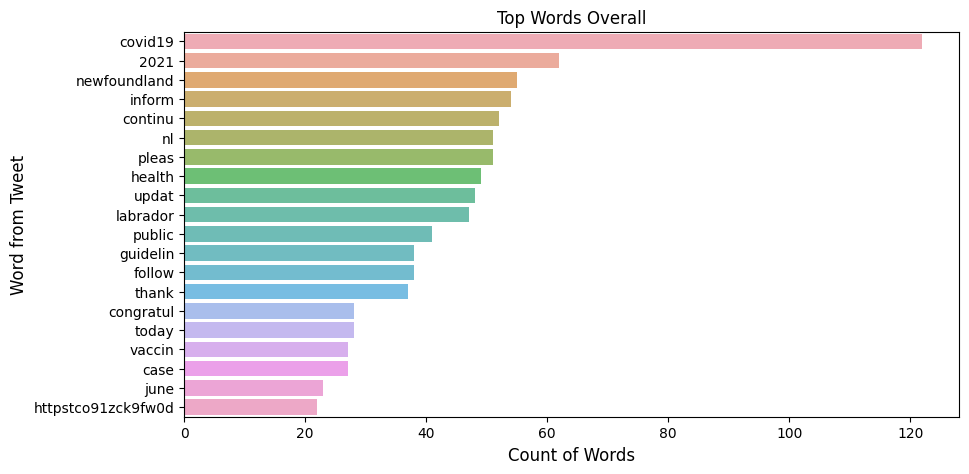

In [25]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [27]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


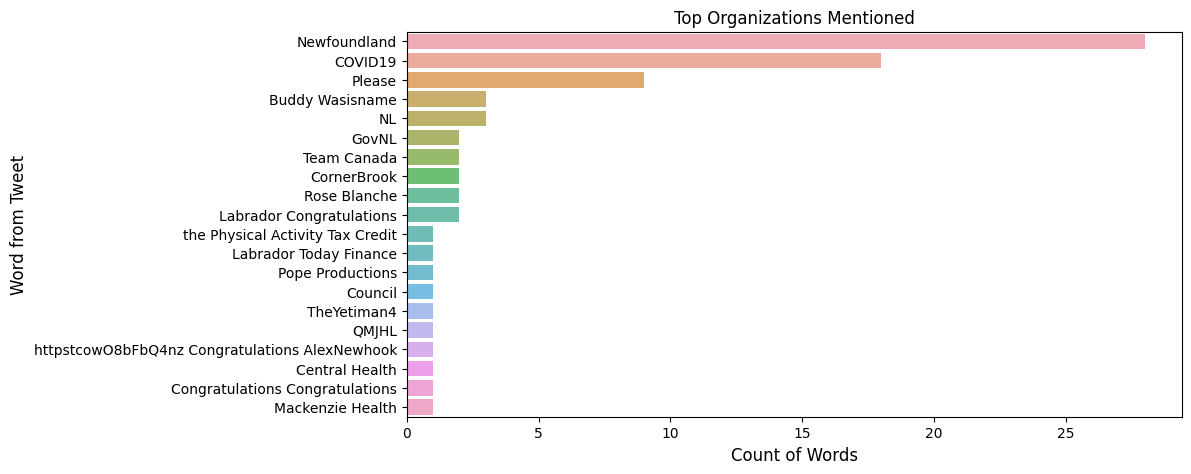

In [28]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [29]:
df.to_csv("furey_word_count.csv")